In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import random as rnd
import scipy.stats as sps
import scipy.optimize as spo
import csv as csv
import datetime as dt
from matplotlib.patches import Ellipse
#from astroML.stats.random import bivariate_normal

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session


mean, variance is 1.00000512667 0.166796344812
mean, variance is 1.49972822115 0.250006225587
mean, variance is 2.50051160818 0.416538002094
mean, variance is 4.99964915964 0.83260006102


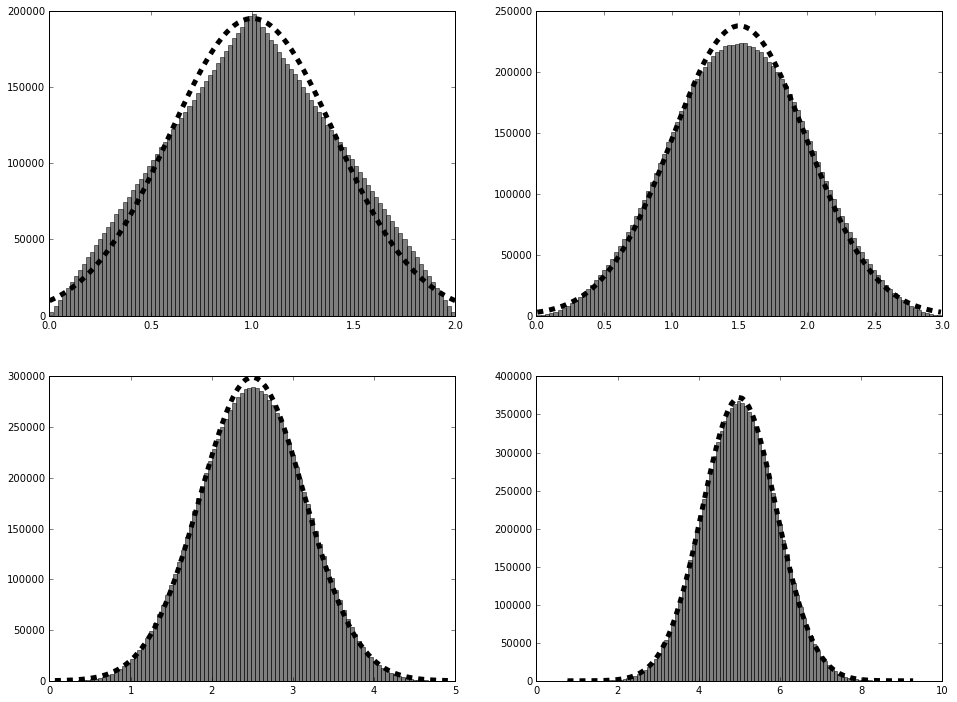

In [4]:
#Central Limit Theorem with uniform distribution:
nRands =    [2,3,5,10];

nVals=10000000;
f,axarr = plt.subplots(2,2)
print axarr[0]
for j,(nRand,ax) in enumerate(zip(nRands,axarr.reshape(-1))):
    
    randSum = np.zeros(nVals);
    for i in range(nRand):
        randSum+=sps.uniform.rvs(size=nVals);
    
    #finding the mean and variance is easy: 
    meanSum = randSum.mean()
    varSum  = randSum.var()
    print "mean, variance is" ,meanSum, varSum
    n,bins,patches=ax.hist(randSum,bins=100,facecolor='black',alpha=0.5);
    xs=np.linspace(bins[0],bins[-1],100);
    #pdf = sps.norm.pdf(xs,loc=popt[0],scale=popt[1])*(bins[1]-bins[0])*nVals;
    pdf = sps.norm.pdf(xs,loc=meanSum,scale=np.sqrt(varSum))*(bins[1]-bins[0])*nVals;
    ax.plot(xs,pdf,'k--',linewidth=5);
plt.show()

mean, variance is 0.595784691476 8.84635789366
mean, variance is 1.21412415336 17.6616542168
mean, variance is 3.01201808088 44.1724315258
mean, variance is 600.553412782 8890.61461638


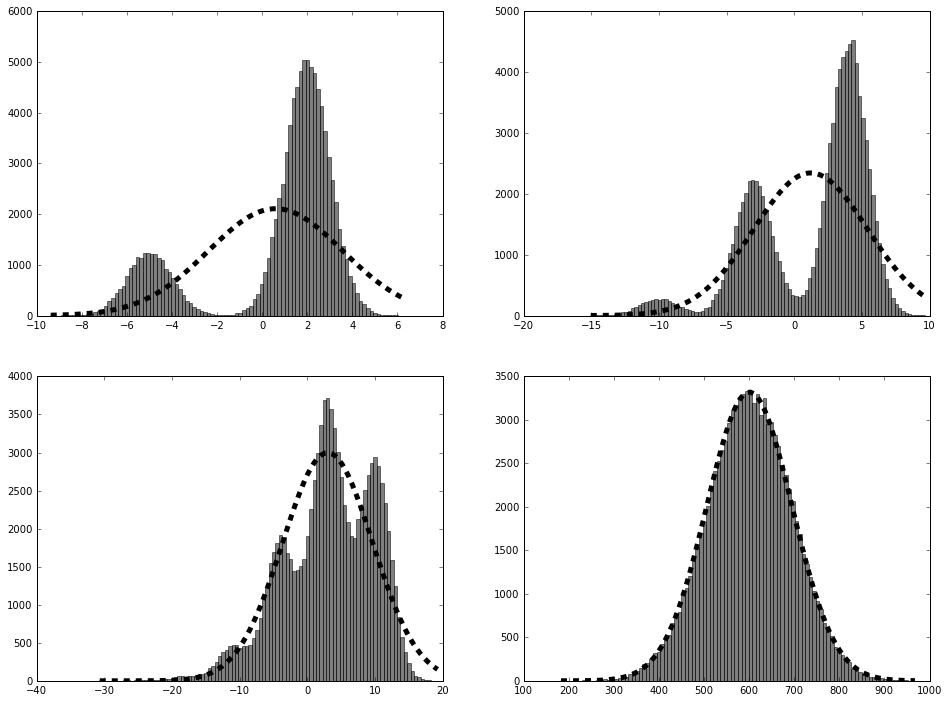

In [5]:
#Central Limit Theorem with bimodal distribution:
nRands =    [1,2,5,1000];
nVals=100000;

mu1=-5
mu2=2
alpha=0.2

poisson=False

f,axarr = plt.subplots(2,2)
print axarr[0]
for j,(nRand,ax) in enumerate(zip(nRands,axarr.reshape(-1))):
    
    randSum = np.zeros(nVals);
    for i in range(nRand):
        nr1 = sps.poisson.rvs(alpha*nVals);
        if (nVals<nr1):
            nr1=nVals;
        
        r1 = sps.norm.rvs(loc=mu1,size=nr1);
        r2 = sps.norm.rvs(loc=mu2,size=nVals-nr1)
        if poisson:
            r1 = sps.poisson.rvs(abs(mu1),size=nr1);
            r2 = sps.poisson.rvs(abs(mu2),size=nVals-nr1);
        rtot = np.concatenate([r1,r2])
        np.random.shuffle(rtot)
        randSum+=rtot
        
    
    #finding the mean and variance is easy: 
    meanSum = randSum.mean()
    varSum  = randSum.var()
    print "mean, variance is" ,meanSum, varSum
    n,bins,patches=ax.hist(randSum,bins=100,facecolor='black',alpha=0.5);
    xs=np.linspace(bins[0],bins[-1],100);
    #pdf = sps.norm.pdf(xs,loc=popt[0],scale=popt[1])*(bins[1]-bins[0])*nVals;
    pdf = sps.norm.pdf(xs,loc=meanSum,scale=np.sqrt(varSum))*(bins[1]-bins[0])*nVals;
    ax.plot(xs,pdf,'k--',linewidth=5);
plt.show()

In [6]:
#some useful methods for scipy.stats:

a = sps.norm(0,1)
print a.rvs(3) ,"3 random #s"
print a.pdf(1) ,"pdf(1)"
print a.cdf(1) ,"cumulative function(1)"
print a.ppf(0.5) ,"inverse cumulative function(0.5)"

[-0.42776157  2.04671669 -1.13989103] 3 random #s
0.241970724519 pdf(1)
0.841344746069 cumulative function(1)
0.0 inverse cumulative function(0.5)


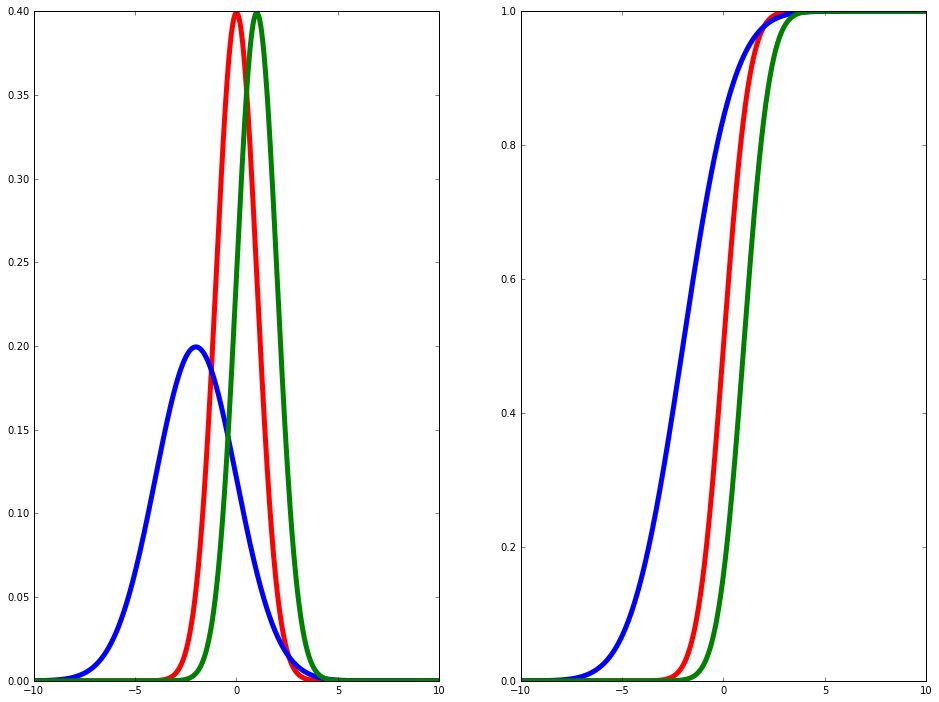

In [7]:
mus = [0.,-2,1.]
sigmas = [1.,2.,1.]
colors = ['r','b','g']
fig,[ax1,ax2] = plt.subplots(1,2)

xs = np.linspace(-10.,10.,1000)

for mu,sigma,color in zip(mus,sigmas,colors):
    a=sps.norm(mu,sigma)
    pdf = a.pdf(xs)
    cdf = a.cdf(xs)
    ax1.plot(xs,pdf,color=color,linewidth=5)
    ax2.plot(xs,cdf,color=color,linewidth=5)
    
plt.show()
    
    

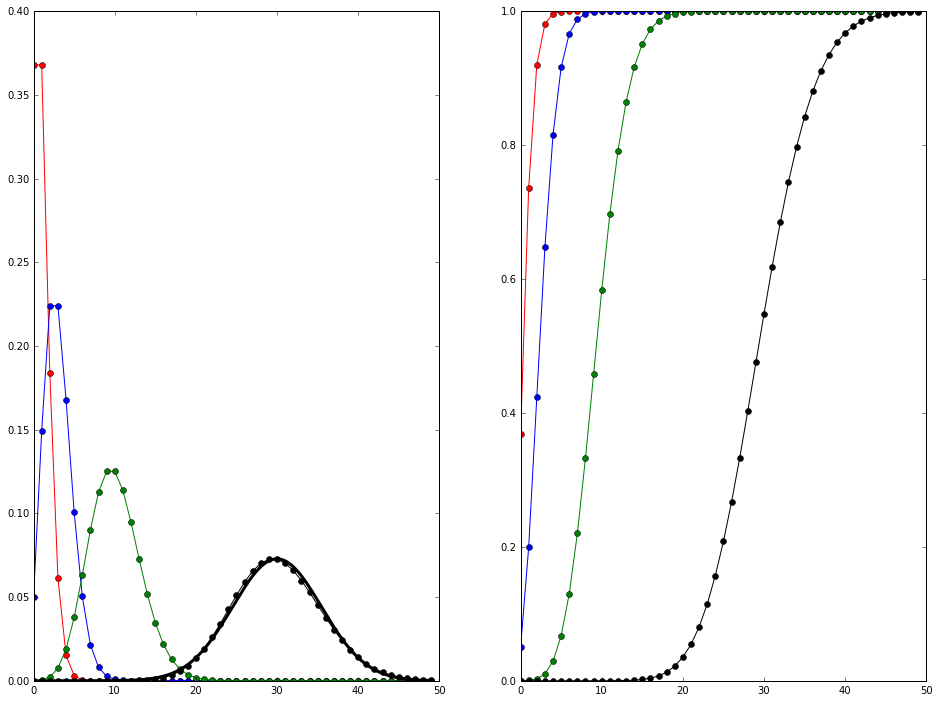

In [8]:
mus = [1,3,10,30]
colors = ['r','b','g','k']
fig,[ax1,ax2] = plt.subplots(1,2)
xs = range(0,50)
for mu,color in zip(mus,colors):
    a=sps.poisson(mu) 
    pdf = a.pmf(xs)
    cdf = a.cdf(xs)
    ax1.plot(xs,pdf,marker='o',color=color)
    ax2.plot(xs,cdf,marker='o',color=color)
    
xs2 = np.linspace(xs[0],xs[-1],1000)
a = sps.norm(mus[-1],np.sqrt(mus[-1]))
pdf2 = a.pdf(xs2)
ax1.plot(xs2,pdf2,color=colors[-1],linewidth=3)
    
plt.show()
    
    

In [9]:
r=sps.randint(0,3)
def Monty(door=0,switch=False):
    trudoor = r.rvs()
    if switch:
        if door==trudoor:
            return 0.
        else:
            return 1.
    else:
        if door==trudoor:
            return 1.
        else:
            return 0.

#try (not) switching for 10000 runs:
N = 10000
sum = 0.
for i in range(N):
    sum +=Monty(r.rvs(),False)
print "not switching gives " ,sum ," wins"
sum = 0.
for i in range(N):
    sum +=Monty(r.rvs(),True)
print "switching gives " ,sum ," wins"

not switching gives  3344.0  wins
switching gives  6656.0  wins


correlated:  1.0
anticorrelated:  -1.0
avg spearman corr uncorr is  0.00135058505851
avg spearman corr corr  -0.478161044104


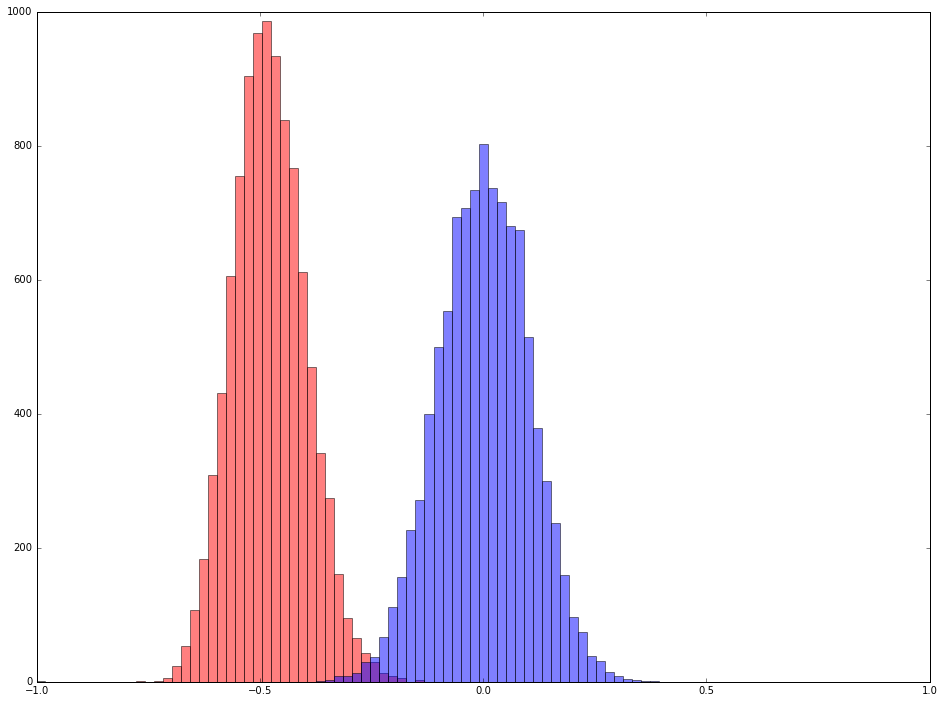

In [68]:
#correlation testing: 

sx = 1.
sy = 1.
rho = -0.5

mean = [0,0]
cov = [[sx**2,rho*sx*sy],[rho*sx*sy,sy**2]]

def spearman(x,y):
    sorty = [yy for xx,yy in sorted(zip(x,y))]
    ranky = np.array([i for yy,i in sorted(zip(sorty,range(1,len(y)+1)))])
    rankx = np.arange(1,len(y)+1) 
    
    N= float(len(x))
    s=((rankx-ranky)**2).sum() #sum of squared difference in index
    r =1.-6.*s/(N*(N**2-1.))
    return r


print "correlated: " ,spearman([0,1,2],[0,1,2])
print "anticorrelated: ", spearman([0,1,2],[0,-1,-2])



aspu=0.
aspc=0.
ntest = 10000
aspus = np.zeros(ntest)
aspcs = np.zeros(ntest)
for i in range(ntest):
    #test on non-correlated gaussians: 
    a = sps.multivariate_normal(mean,[[sx**2,0],[0,sy**2]])
    rva = a.rvs(100)
    xa = rva[:,0] 
    ya = rva[:,1]
    aspus[i]= spearman(xa,ya)
    
    
    #test on correlated gaussians:
    b = sps.multivariate_normal(mean,cov)
    rvb = b.rvs(100)
    xb = rvb[:,0] 
    yb = rvb[:,1]
    aspcs[i]=spearman(xb,yb)
    
    
    
print "avg spearman corr uncorr is ", aspus.mean()
print "avg spearman corr corr ", aspcs.mean()
    

f,ax = plt.subplots(1,1)
n,bins,patches=ax.hist(aspcs,bins=np.linspace(-1,1,100),facecolor='red',alpha=0.5);
n,bins,patches=ax.hist(aspus,bins=np.linspace(-1,1,100),facecolor='blue',alpha=0.5);
plt.show()